
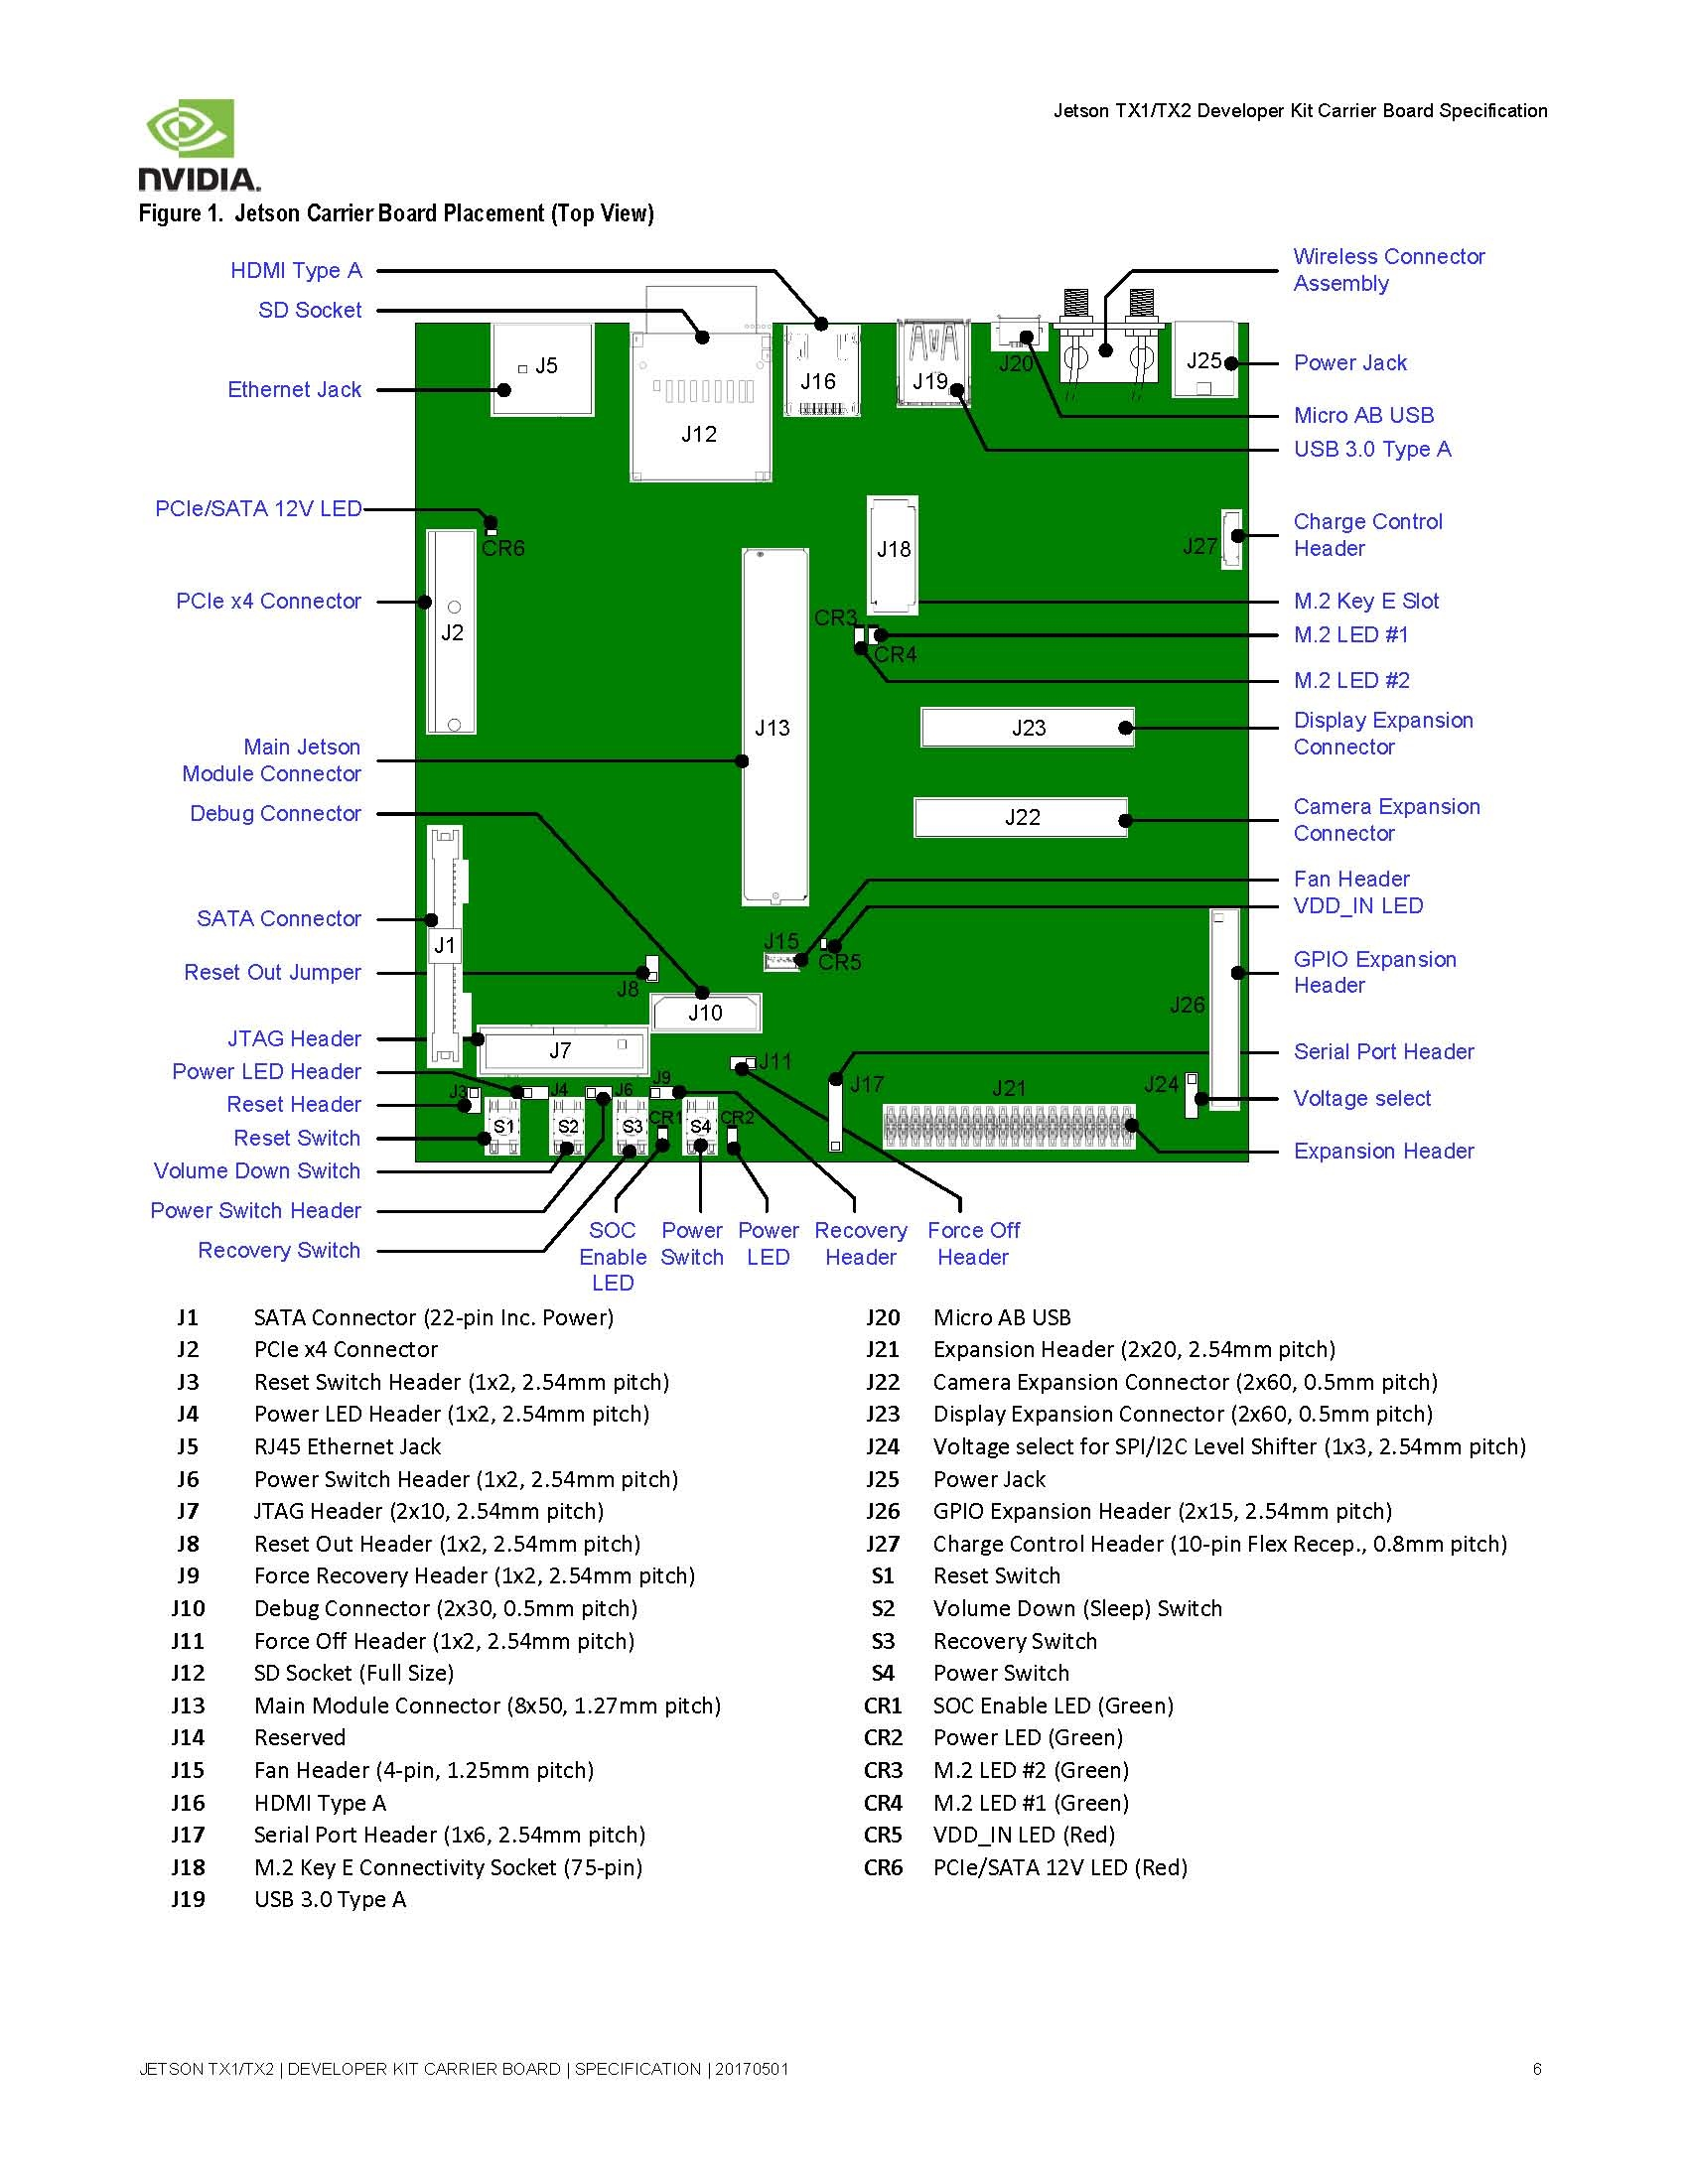


S2-Volume Down Switch=User definable button


S3-Force Recovery


J21-40 pin GPIO Header


J26-30 pin GPIO Expansion Header-it includes CAN


J18-mini PCIe expansion slot for additional communication option



We will need ubuntu linux system as a host. Connect mouse, keyboard,wifi antenna etc-->power button(S4)-->if nothing happens, press reset(S1)-->follow instuctions in the monitor. Change directories and run the installer script-->reboot-->linux ubuntu graphical window comes up-->Load software on the host to flash memory on Jetson with the latest developement environment.Later we can connect with the host using ethernet or wifi.

NOTE:

JetPack 3.1 requires Ubuntu 14.04 on your host PC
JetPack 3.2 Developer Preview supports Ubuntu 16.04 on your host PC
Ubuntu 14.04 on your host PC will also work, except OpenCV and VisionWorks will be unavailable for installation on that host PC


BATTERY

The development kit wall supply provide 5.5v-19v with a max current of 4amps
Battery voltage vary between fully charged and partially charged. Therefore, make sure the total battery voltage is always in the recommended range to avoid damaging components.

Battery options:
    1. 12V 2800mAh NiMH - longer lifespan and simpler charger 
    Spec:
    Nominal Voltage: 12V
    Chemistry: NiMH
    Capacity: 2.8 Ah
    Continuous Discharge: 2.8 A
    Burst Discharge: 5.6 A
    Connector: Tamiya
    Cell Type: Sub-C (10 Cells)
    2. 3S 2200mAh 25C LiPo(needs LiPo charging Bag to avoid fire) - Sensitive chemistry and lighter weight
    Spec.
    Minimum Capacity: 2200mAh
    Configuration: 3S1P / 11.1v / 3Cell
    Constant Discharge: 25C
    Peak Discharge (10sec): 35C
    Pack Weight: 188g
    Pack Size: 105 x 33 x 24mm
    Charge Plug: JST-XH
    Discharge plug: XT60
There are a myriad of different battery types out there in addition to LiPO and NiMH - LiFePo4, Li-ion, lead acid, ect. Technically anything that remains within the 5.5-19.6V range and supplies 1-2A (or 15W) of continuous current, should be ok to try. And of course, if you use a voltage regulator in your project, you are basically free to choose whatever - in one of my recent projects, I'm using 6S 24V LiPO's with a 24V-12V step-down regulator

Additionally, an adapter, a terminal, a DC Jack that goes into developement board is required.The Jetson TX2 DC power plug dimensions are 5.5x2.5mm barrel type plug. Look for an adapter that matches this to your battery pack plug.

Battery discharge curves:

http://www.shdesigns.org/batts/battcyc.html

https://www.powerstream.com/AA-tests.htm


GPIO

General Purpose Input Output

Each GPIO pin has a signal name. Signal name suggest a use for the pin e.g. modemwake for pin 18 on J21.
Each pin is also mapped to a virtual file in the sys/class/gpio directory.

GPIO software access:
1. using Sudo class move to the virtual GPIO directory at sys/class/gpio
2. GPIO pin must be exported in order to use it by echoing the mapped sysfs virtual file number to the export virtual file-->export GPIO virtual file directory is being created with a direction file and a value file inside the directory.
3. Echo new direction(out/in) to the direction file e.g. echo out>gpio481/direction
4. a voltage can be changed from low to high by echoing 1 to the value file echo 1>gpio481/value

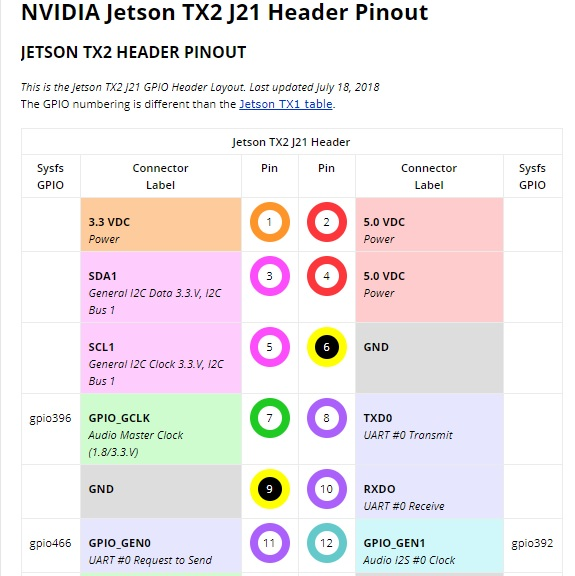

part 2
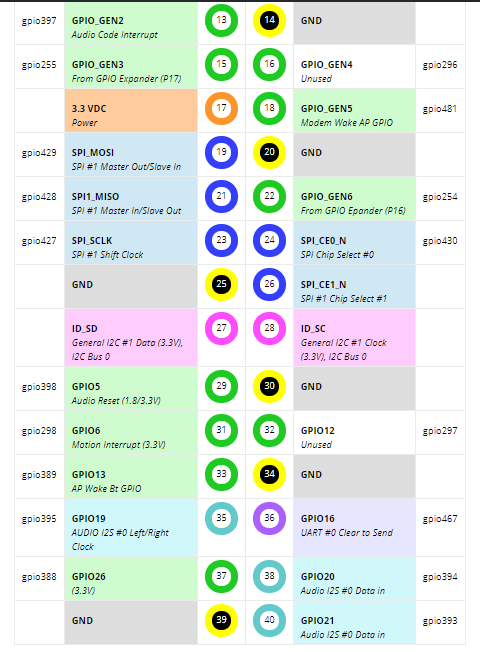


"direction" ... reads as either "in" or "out".Writing as "out" defaults to initializing the value as low.

"value" ... reads as either 0 (low) or 1 (high).If the GPIO is configured as an output, this value may be written;

"edge" ... reads as either "none", "rising", "falling", or "both".

"active_low" ... reads as either 0 (false) or 1 (true). Write any nonzero value to invert the value attribute both for reading and writing. 

typical process:

    $Sudo -s
    $password:
    #cd sys/class/gpio
    sys/class/gpio# echo 481>export
    sys/class/gpio# ls
    sys/class/gpio# export gpio481
    sys/class/gpio# cat gpio481/direction >> in
    sys/class/gpio# cat gpio481/value >> 0
    sys/class/gpio# echo out > gpio481/direction
    sys/class/gpio# echo 1 > gpio481/value
    sys/class/gpio# cat gpio481/direction >> out
    sys/class/gpio# cat gpio481/value >> 1
    

I2C (SENSOR AND ACTUATOR COMM)

I2C stands for Inter-Integrated Circuit, and is a multi-master, multi-slave serial bus protocol

It can also be used over USB.I2C pin pairs consist of a data pin (SDA) and a clock pin (SCL). The Jetson TX2 Development board has pinouts on the J21 and J26 

Installed I2C components can be accessed in user space from the command line or software. Install I2C Linux tools as follows:

$ sudo apt-get install libi2c-dev i2c-tools

Then use i2cdetect from the command line to verify that a device is connected at a particular address.

Simple hobby-type servo-motors may require PWM (pulse-width modulated) signals for control. However, rather than produce those signals directly with the Jetson,an external I2C-addressable controller board is used as an intermediary to produce the signals.

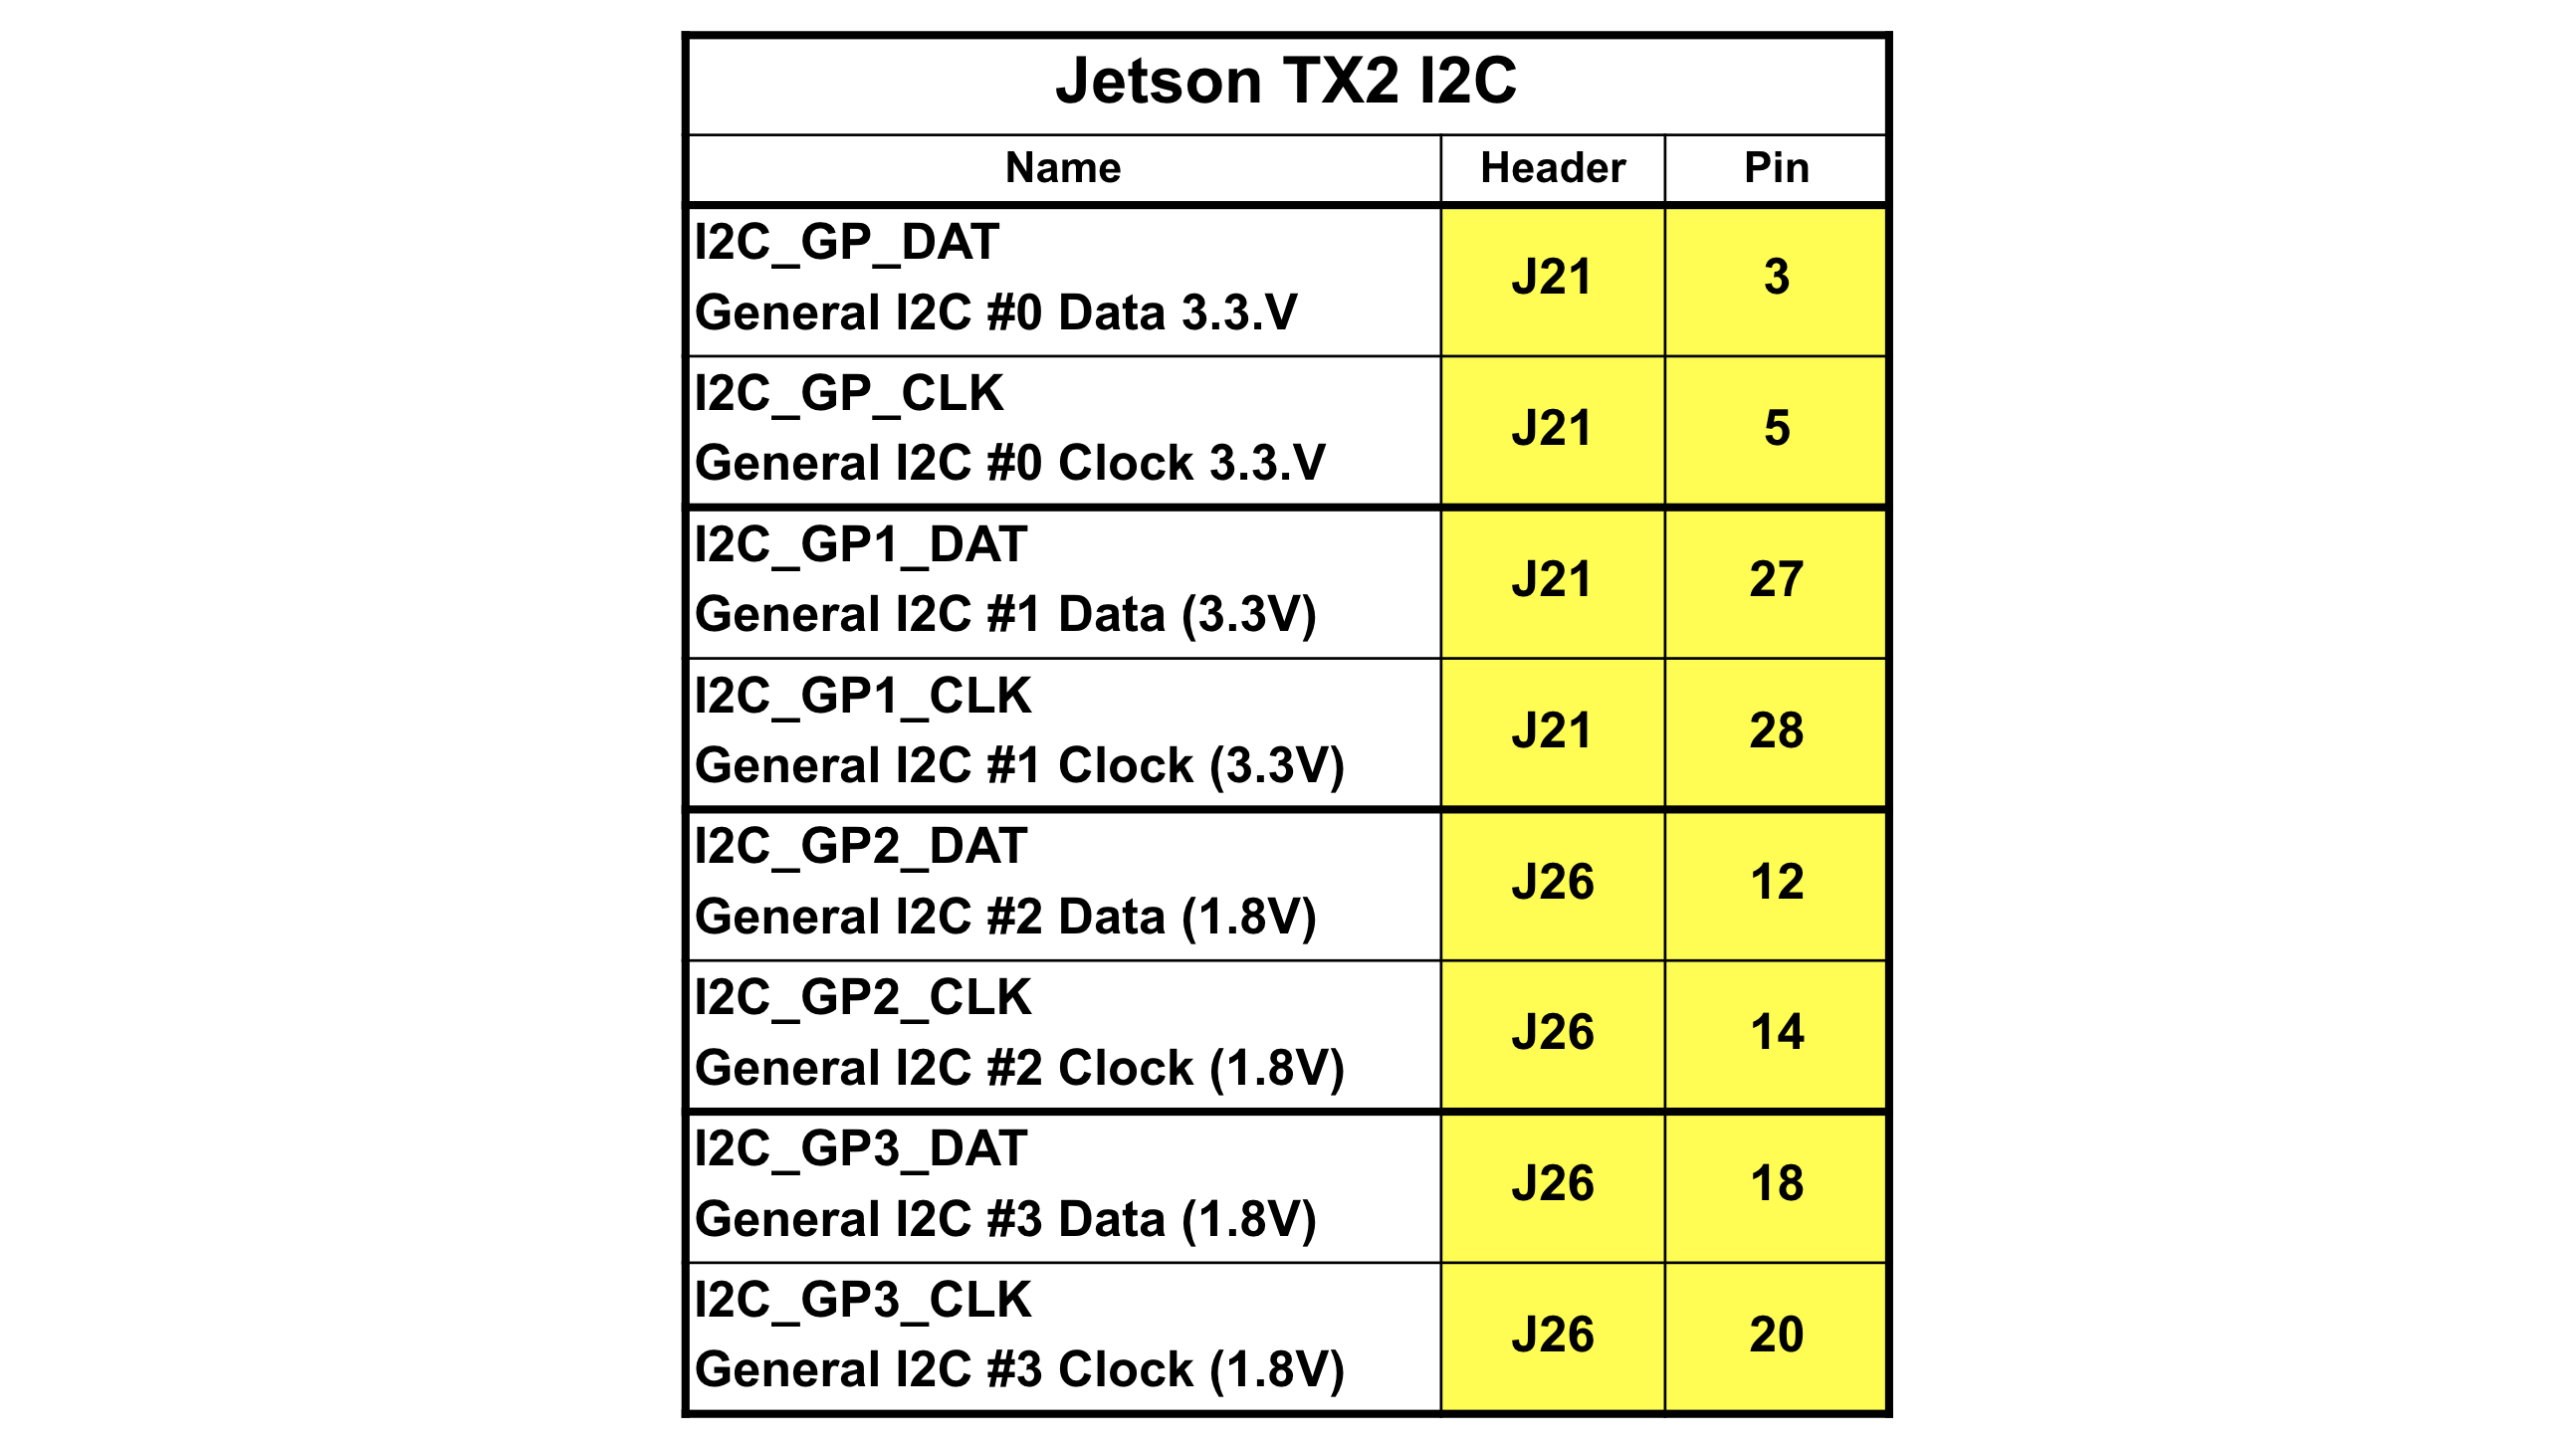

IMU control using breadboard

Jetson TX1 I2C signal bus 1 

pin1(3.3v)--> +rail--> Vcc of PCA9685

pin 6(gnd)--> grnd rail--> GND of PCA9685

pin 27(SDA)--> SDA of PCA9685

pin 28(SCL)--> SCL of PCA9685

USB(female) connection--> 3.3v to vcc,gnd to gnd, SDA to D+, SCL to D-

goes to: mini USB--> 3.3v to vcc,gnd to gnd, D+ to SDA,D- to SCL

top servo--> 2nd pin of PWM ckt(PCA9685)

bottom servo--> 1st pin of PWM ckt(PCA9685)

Provide additional 6V to the PWM ckt

Program:

jetsonhacks/RTIMULib in the github

Use QT to open up JetsonTX1demoGL.pro file from the JetsonTX1demoGL folder (to install QT visit https://www.youtube.com/watch?v=xVTSp4AcFfo)--> build--> use the following path to run the code on jetson





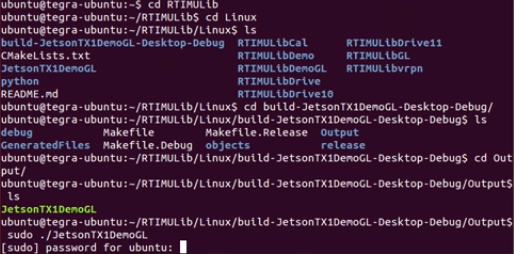

https://www.sparkfun.com/products/12700

https://www.trossenrobotics.com/robotgeek-pantilt.aspx

https://www.adafruit.com/product/2472

https://www.adafruit.com/product/815

https://www.sparkfun.com/products/12035

https://www.amazon.com/gp/product/B00XJ2Q5N2/ref=as_li_tl?ie=UTF8&camp=1789&creative=390957&creativeASIN=B00XJ2Q5N2&linkCode=as2&tag=jetsonhacks-20&linkId=27KKMW7IZ6QY4BAA

https://www.amazon.com/gp/product/B009SNJ0NS/ref=as_li_tl?ie=UTF8&camp=1789&creative=390957&creativeASIN=B009SNJ0NS&linkCode=as2&tag=jetsonhacks-20&linkId=U5ZRPO2HF32BENUN



More on I2C

https://learn.sparkfun.com/tutorials/i2c

https://www.i2c-bus.org/

https://www.i2c-bus.org/i2c-primer/

https://i2c.info/

https://www.systutorials.com/docs/linux/man/8-i2cdetect/

LIDAR project
https://www.jetsonhacks.com/2015/12/08/gpioi2c-on-jetson-tx1-lidar-lite-v2-installation/

USB3

https://www.roboticstomorrow.com/article/2014/06/usb-30-steps-up-to-the-plate/4150

Servo Controller

https://www.pololu.com/category/102/maestro-usb-servo-controllers
https://github.com/dusty-nv/turbo2/blob/master/ServoController.cpp

Camera buying options

https://www.robotshop.com/en/cameras-vision-sensors.html

elinux camera info

https://elinux.org/Jetson/Cameras


